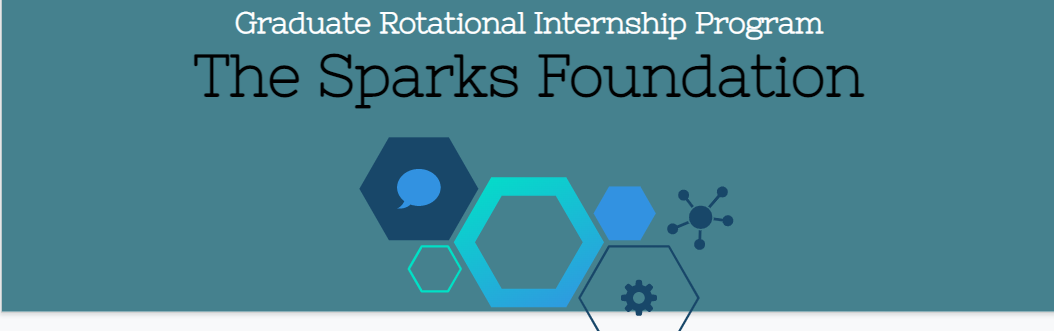

<h1 style="color:blue; font-family:Times New Roman">Task 6 : Prediction using Decision Tree Algorithm</h1>

<h4 style="color:brown;font-family:Times New Roman"">AUTHOR: DHANUSH BEDRE</h4>

<p style = "font-family:Times New Roman"><strong>Problem Statement:</strong> Given some features of a flower (iris dataset)with their respective target names. Build a model to analyze and categorize the flower based on its features.</p>


<p style="font-family:Times New Roman"><b>Approach:</b> This type of problems belong to classification problems. We can solve this by using supervised machine learning classification algorithm (such as SVC, DecisionTreeClassifier).</p>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Load Iris Dataset into a dataframe

In [2]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns=iris.feature_names+['target'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
print(np.unique(iris.target))  # 0 --> setosa;  1 --> versicolor; 2 --> virginica
iris.target_names

[0 1 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
def get_name(x):
    if(x==0) : return 'Iris-setosa' 
    elif(x==1) : return'Iris-versicolor'
    else : return 'Iris-virginica'

df['target_name'] = df['target'].apply(get_name)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-setosa
5,5.4,3.9,1.7,0.4,0.0,Iris-setosa
6,4.6,3.4,1.4,0.3,0.0,Iris-setosa
7,5.0,3.4,1.5,0.2,0.0,Iris-setosa
8,4.4,2.9,1.4,0.2,0.0,Iris-setosa
9,4.9,3.1,1.5,0.1,0.0,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
# Check if there are any NaN values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [7]:
data = df.values
X_val = data[:,0:4]
Y_val = data[:,4]

In [8]:
Y_Data = np.array([np.average(X_val[:, i][Y_val==j]) for i in range (X_val.shape[1]) for j in (np.unique(Y_val))])
Y_Data = Y_Data.reshape(4, 3)
Y_Data = np.swapaxes(Y_Data, 0, 1)

X_axis = np.arange(len(df.columns)-2)
width = 0.2

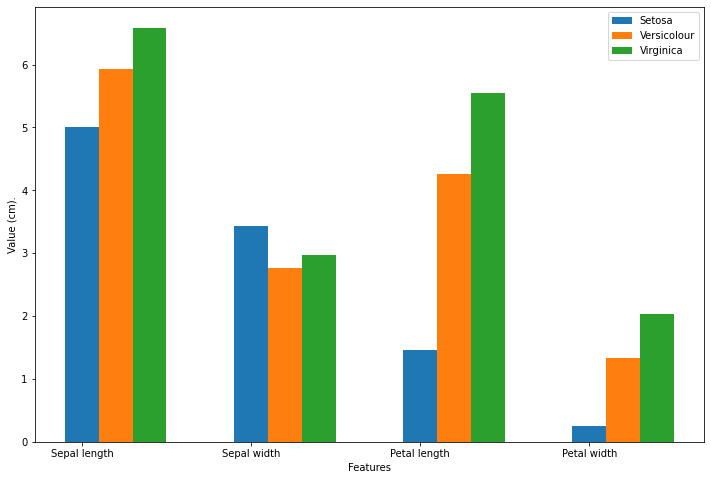

In [9]:
plt.figure(figsize=(12,8))
plt.bar(X_axis, Y_Data[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data[2], width, label = 'Virginica')

plt.xticks(X_axis,['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
plt.xlabel("Features")
plt.ylabel("Value (cm).")
plt.legend(bbox_to_anchor=(1,1))

plt.show()

### Split the Dataset into Train & Test Data 

In [10]:
X = df.drop(['target','target_name'],axis="columns")
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("Set size:",df.shape[0])
print("Train size:",len(X_train))
print("Test size:",len(X_test))

Set size: 150
Train size: 112
Test size: 38


### DecisionTreeClassifier Model

In [11]:
model_dtc = DecisionTreeClassifier()
#feed the train data
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier()

### Model score

In [12]:
model_dtc.score(X_test,y_test)

0.9736842105263158

### Average Model Score

<h3 style='color:purple'>cross_val_score function</h3>

In [13]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=6, test_size=0.2)
arr = cross_val_score(DecisionTreeClassifier(), X, y,cv=cv)
print(list(arr))
print("Average Score:",np.mean(arr))

[0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 1.0]
Average Score: 0.9500000000000001


### Decision Tree Visualization

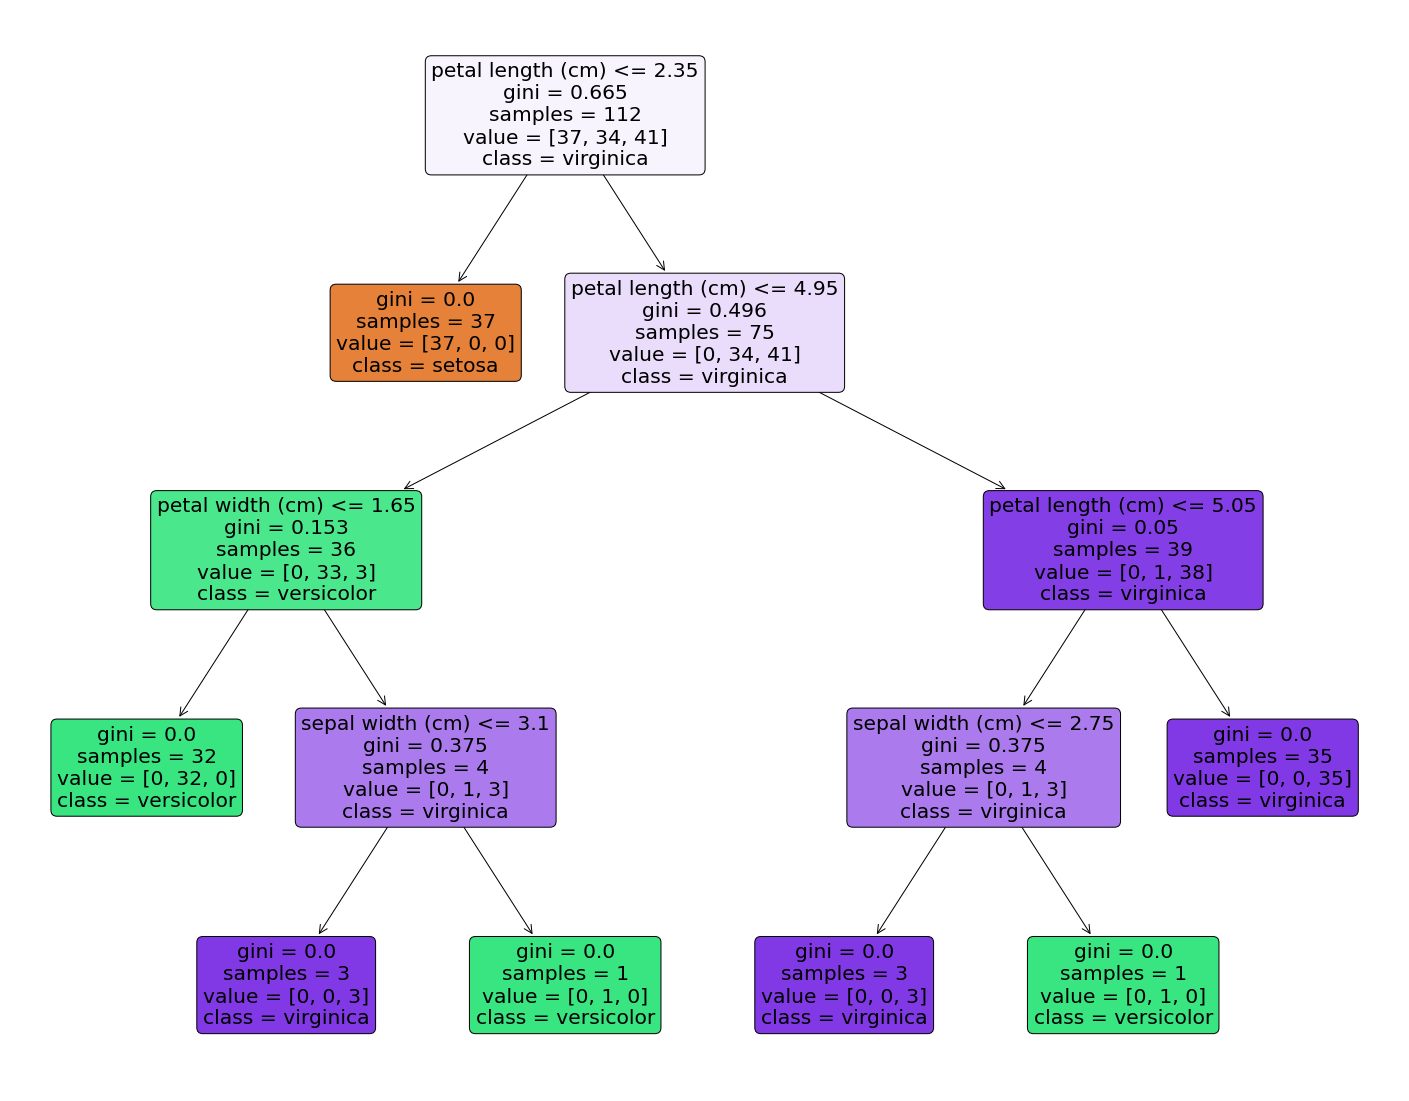

In [14]:
fig = plt.figure(figsize=(25,20))
fig = plot_tree(model_dtc,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               rounded=True, 
               filled = True)